# EDA with Categorical Variables
CREDIT: https://github.com/hoffm386/eda-with-categorical-variables/blob/master/index.ipynb

https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

Whether EDA (exploratory data analysis) is the main purpose of your project, or is mainly being used for feature selection/feature engineering in a machine learning context, it's important to be able to understand the relationship between your features and your target variable.

Many examples of EDA emphasize numeric features, but this notebook emphasizes categorical features.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

## The Dataset

This analysis uses the [Titanic dataset](https://www.kaggle.com/c/titanic/data) in order to predict whether a given person survived or not

This dataset has the following columns:

| Variable | Definition | Key |
| -------- | ---------- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

To get started, we'll open up the CSV with Pandas.

(If you were using this for a machine learning project, you would additionally separate the dataframe into `X` and `y`, and then into train and test sets, but for the purposes of this example we'll assume that the entire `titanic.csv` contains training data.)

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/hoffm386/eda-with-categorical-variables/master/titanic.csv")


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    object 
 3   Sex       714 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     714 non-null    int64  
 6   Parch     714 non-null    int64  
 7   Ticket    714 non-null    object 
 8   Fare      714 non-null    float64
 9   Cabin     185 non-null    object 
 10  Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.9+ KB


In [6]:
#we only see objects that are numbers

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

In [7]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
df[['Sex','Name']]

,Sex,Name
0,male,"Braund, Mr. Owen Harris"
1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,female,"Heikkinen, Miss. Laina"
3,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,male,"Allen, Mr. William Henry"
...,...,...
886,male,"Montvila, Rev. Juozas"
887,female,"Graham, Miss. Margaret Edith"
888,female,"Johnston, Miss. Catherine Helen ""Carrie"""
889,male,"Behr, Mr. Karl Howell"


Gender Ratio

In [9]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df["Sex"].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [21]:
# PassengerId is a dataset artifact, not something useful for analysis
df.drop("PassengerId", axis=1, inplace=True)
df

KeyError: "['PassengerId'] not found in axis"

In [22]:
# We want to use Age as one of the main examples, drop rows that are missing Age values
df.dropna(subset=["Age"], inplace=True)

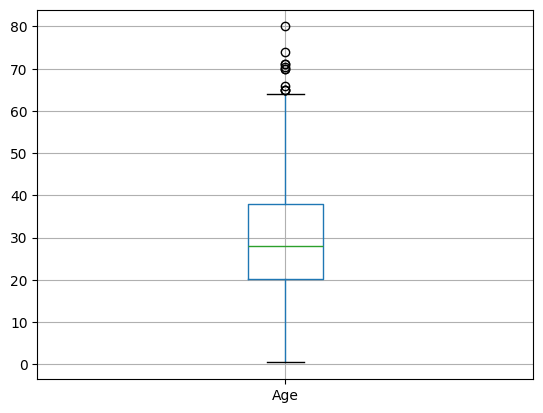

In [20]:
df[['Age']].boxplot()
#plt.show(df[['Age']].hist())
plt.show()

## Numeric vs. Categorical EDA

Here we are trying to see the relationship between a given numeric feature and the target, which is categorical.  Let's use the `Age` column as an example.


### Multiple Histograms

Rather than using the y axis to represent the two categories, let's use two different colors.  That means that we can use the y axis to represent counts rather than trying to discern this information from the density of dots.

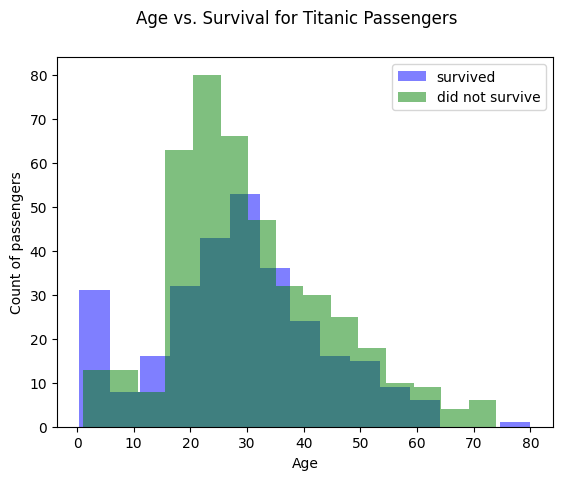

In [14]:
fig, ax = plt.subplots()

ax.hist(df[df["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(df[df["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

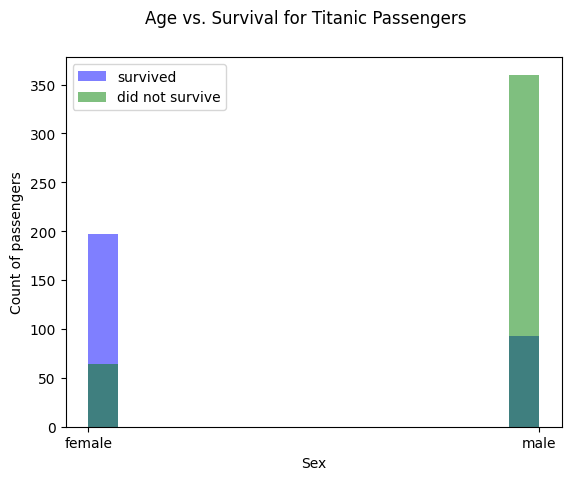

In [33]:
fig, ax = plt.subplots()

ax.hist(df[df["Survived"]==1]["Sex"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(df[df["Survived"]==0]["Sex"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Sex")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

### Multiple Density Estimate Plots

This is showing largely the same information as the histograms, except that it's a density estimate (estimate of the probability density function) rather than a count across bins.  Seaborn has nice built-in functionality for this.

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

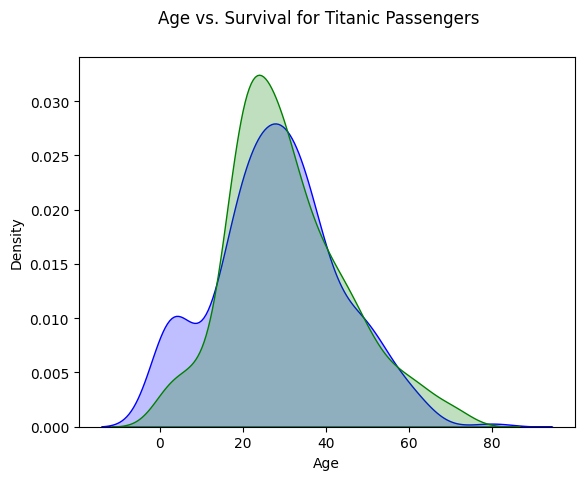

In [20]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Survived"]==1]["Age"], fill=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Survived"]==0]["Age"], fill=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Titanic Passengers");

### Multiple Box Plots

Here we lose some of the information about the distribution overall in order to focus in on particular summary statistics of the distribution

<a title="Dcbmariano / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)" href="https://commons.wikimedia.org/wiki/File:Box_plot_description.jpg"><img width="256" alt="Box plot description" src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Box_plot_description.jpg"></a>

Matplotlib and Seaborn both have methods for this.  The Seaborn one is built on top of the Matplotlib one.

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


KeyError: 0

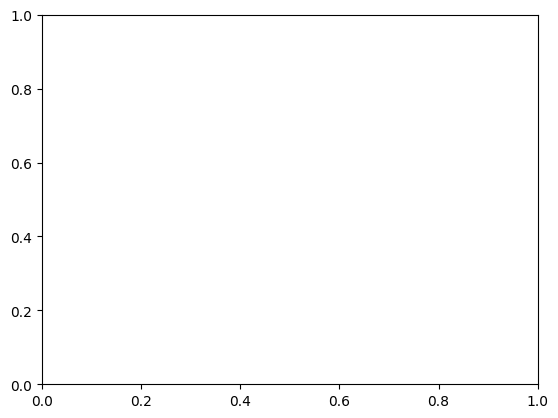

In [23]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Survived", data=df, orient="h", palette={'1' : "blue", '0' : "green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches);

## Categorical vs. Categorical EDA

Here we are trying to see the relationship between a given categorical variable and the target (which is also categorical).  Let's use the `Pclass` (passenger class) feature as an example.

### Grouped Bar Charts

This shows the distribution across the categories, similar to the "multiple histograms" example for numeric vs. categorical

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

AttributeError: 'numpy.int64' object has no attribute 'startswith'

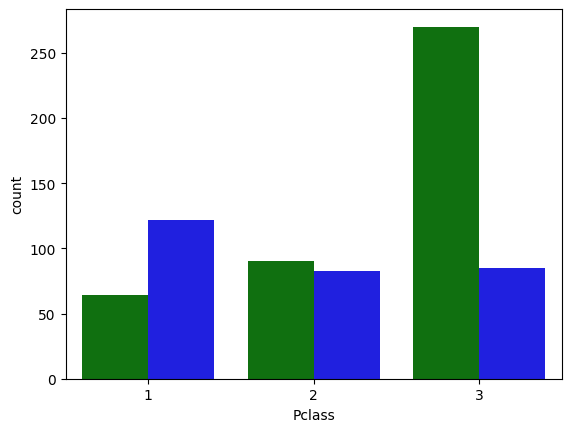

In [24]:
fig, ax = plt.subplots()

# Use countplot instead of catplot
sns.countplot(x="Pclass", hue="Survived", data=df, palette={1: "blue", 0: "green"}, ax=ax)

# Set the labels
ax.set_xlabel("Passenger Class")

# Create custom legend
color_patches = [
    Patch(facecolor="blue", label="Survived"),
    Patch(facecolor="green", label="Did Not Survive")
]
ax.legend(handles=color_patches)

# Set the title
fig.suptitle("Passenger Class vs. Survival for Titanic Passengers")

plt.show()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

AttributeError: 'numpy.int64' object has no attribute 'startswith'

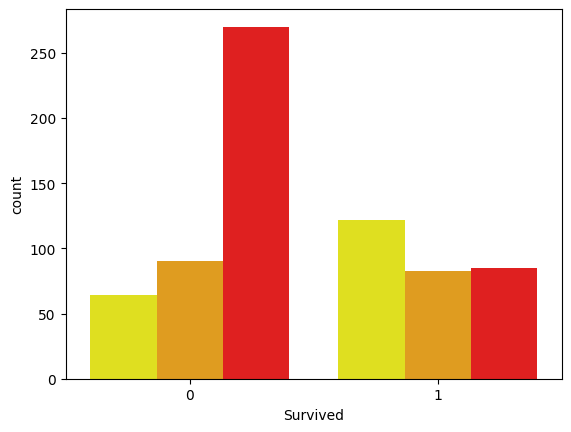

In [25]:
fig, ax = plt.subplots()

# Corrected countplot usage
sns.countplot(x="Survived", hue="Pclass", data=df, palette={1:"yellow", 2:"orange", 3:"red"}, ax=ax)

# Remove plt.close(2) as it is unnecessary

# Set legend title
ax.legend(title="Passenger Class")

# Set x-axis tick labels
ax.set_xticklabels(["did not survive", "survived"])

# Remove x-axis label
ax.set_xlabel("test")

# Set the title
fig.suptitle("Passenger Class vs. Survival for Titanic Passengers")

plt.show()

### Stacked Bar Charts

These can be used for counts (same as grouped bar charts) but if you use percentages rather than counts, they show proportions

In [26]:
# Create a dataframe with the counts by passenger class and survival
counts_df = df.groupby(["Pclass", "Survived"])["Name"].count().unstack()
counts_df

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


In [27]:
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

Pclass,1,2,3
Survived,,,
0,0.150943,0.212264,0.636792
1,0.420690,0.286207,0.293103


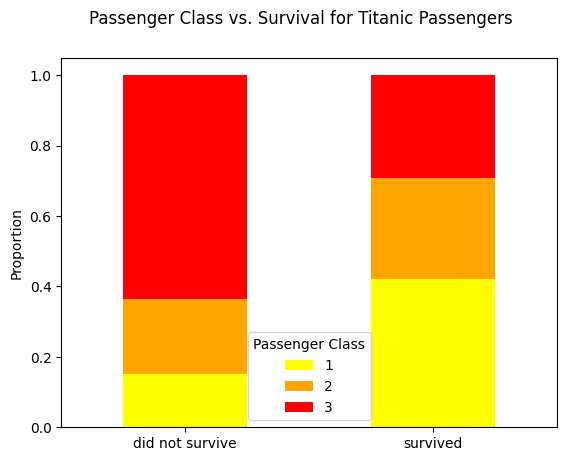

In [28]:
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red"], ax=ax)

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [29]:
# Use the same counts df, but now survived + did not survive add up to 1
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T
survived_percents_df

Survived,0,1
Pclass,,
1,0.344086,0.655914
2,0.520231,0.479769
3,0.760563,0.239437


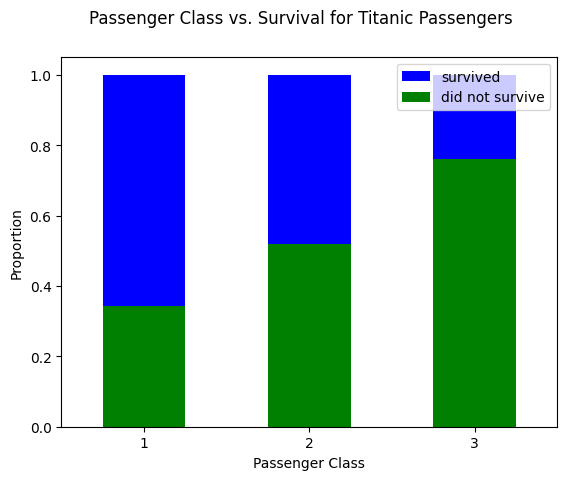

In [30]:
fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");


### Scatterplot with Color to Distinguish Categories

This kind of plot could help you understand how the two features relate to the target

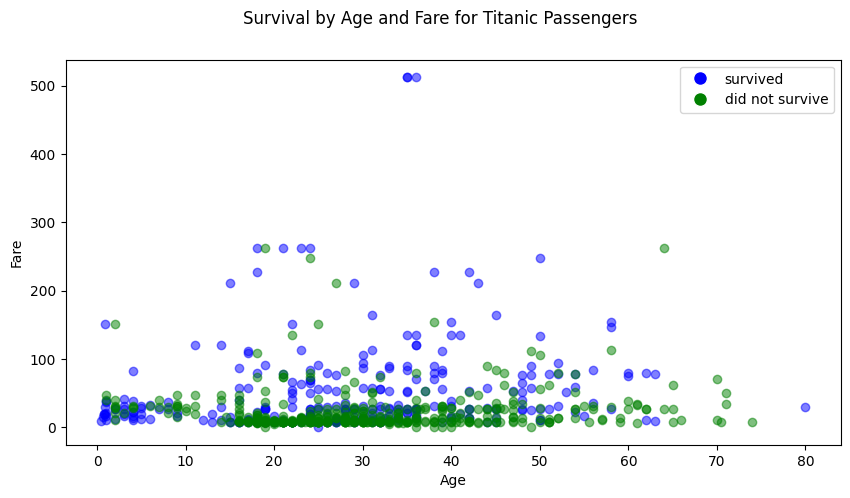

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["Survived"]==1]["Age"], df[df["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(df[df["Survived"]==0]["Age"], df[df["Survived"]==0]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Survival by Age and Fare for Titanic Passengers");

## Summary

Most of the time if your target is a categorical variable, the best EDA visualization isn't going to be a basic scatter plot.  Instead, consider:

#### Numeric vs. Categorical (e.g. `Survived` vs. `Age`)
 - Multiple histograms
 - Multiple density estimate plots
 - Multiple box plots

#### Categorical vs. Categorical (e.g. `Survived` vs. `Pclass`)
 - Grouped bar charts
 - Stacked bar charts

#### Numeric vs. Numeric vs. Categorical (e.g. `Age` vs. `Fare` vs. `Survived`)
 - Color-coded scatter plots

In [3]:
df.boxplots()

AttributeError: 'DataFrame' object has no attribute 'boxplots'